In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.8.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
train_images.shape


(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

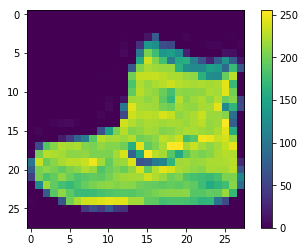

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

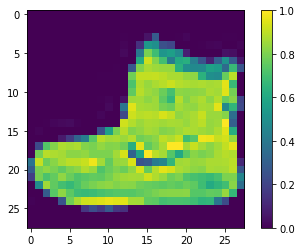

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)


In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

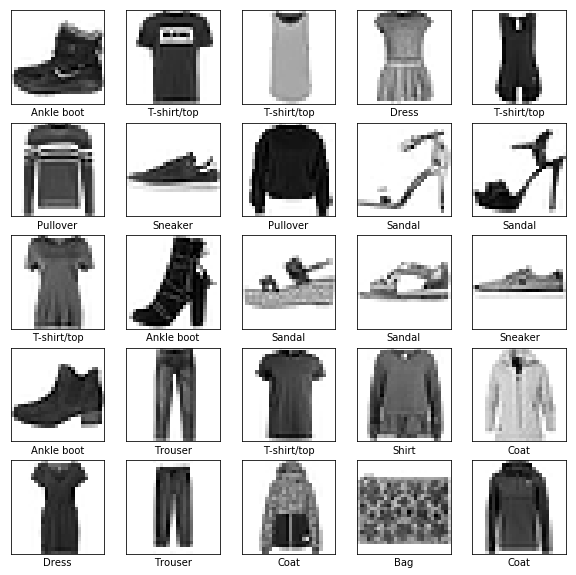

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [22]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 101us/step - loss: 0.4986 - acc: 0.8238
Epoch 2/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.3729 - acc: 0.8648
Epoch 3/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.3371 - acc: 0.8771
Epoch 4/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.3093 - acc: 0.8861
Epoch 5/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.2953 - acc: 0.8908


In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 48us/step
Test accuracy: 0.8751


In [27]:
predictions = model.predict(test_images)

In [33]:
predictions[0]

array([3.1429640e-06, 1.7135731e-08, 1.2544669e-07, 7.5324236e-09,
       1.1964021e-07, 6.7872576e-02, 6.0676894e-07, 4.6009552e-02,
       1.3380629e-05, 8.8610053e-01], dtype=float32)

In [34]:
np.argmax(predictions[0])


9

In [35]:
test_labels[0]

9

In [36]:
class_names[9]

'Ankle boot'

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


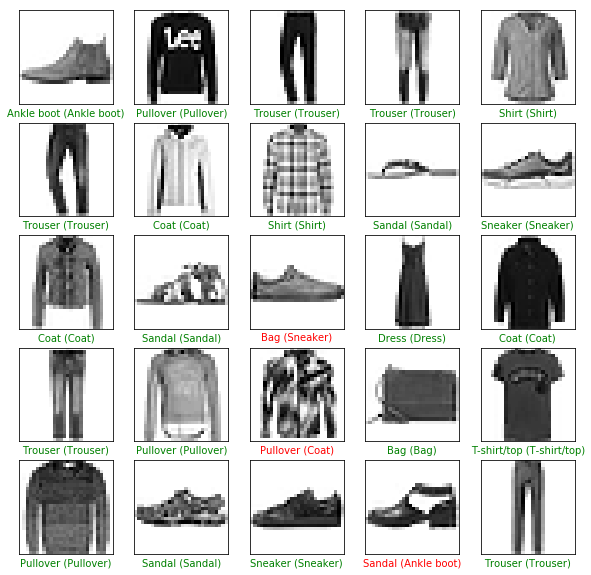

In [37]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)
      